# LaMassa S82 (x-ray) catalog *versus* UKIDSS

In this notebook the cross-matching procedure applied by [LaMassa et al. 2016] (LM hereafter) to multi-wavelength catalogs will  be reproduced. Particularly, we will cross-match the x-ray data from XMM-Newton AO 13 cycle to UKIDSS near-infrared. The goal here is to verify whether we can recover the very same results therein, showing us our algorithm for Maximum Likelihood Estimator to be correct.

The UKIDSS catalog here in use is the same used in LM: UKIDSS-LAS Data Release 8, *primary* objects, cleaned from spurious/noisy detections; "?*apermag3*" magnitude measurements and accordingly errors were retrieved. The table file `ukidss.fits` here used can be taken from [my github repository][github_ukidss].

The LaMassa catalog --from where we'll take the x-ray sources-- was downloaded from [CDS].

[LaMassa et al. 2016]: http://arxiv.org/abs/1510.00852
[github_ukidss]: https://github.com/chbrandt/uks82
[CDS]: http://vizier.u-strasbg.fr/viz-bin/VizieR?-source=J%2FApJ%2F817%2F172

In [3]:
import booq
from booq import table

### X-Ray (Lamassa-XMM-AO13)

In [4]:
tab_lm = table.ATable.read('lamassa/cds/xmmao13.dat',readme='lamassa/cds/ReadMe',format='cds')

In [5]:
df_lm = tab_lm.to_dataframe()
del tab_lm
df_lm.head()

,Seq,ObsID,RAdeg,DEdeg,e_Pos,DistNN,ExtFlag,InXMM,InChandra,FSoft,...,rH,F250,e_F250,F350,e_F350,F500,e_F500,XMMAO10CP,ChCP,CPCoord
0,2359.0,742830101.0,14.097,0.166,4.7,515.8,0.0,no,no,1.61,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,2360.0,742830101.0,14.115,-0.353,3.5,171.7,0.0,no,no,1.68,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,2361.0,742830101.0,14.115,-0.160,5.8,291.7,0.0,no,no,2.02,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,2362.0,742830101.0,14.142,-0.442,3.4,49.1,0.0,no,no,0.95,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,2363.0,742830101.0,14.154,-0.448,2.1,49.1,0.0,no,no,7.25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [6]:
ID_column_lm = 'Seq'
df_lm[ID_column_lm] = df_lm[ID_column_lm].astype(int).astype(str)

df_lm.head()

,Seq,ObsID,RAdeg,DEdeg,e_Pos,DistNN,ExtFlag,InXMM,InChandra,FSoft,...,rH,F250,e_F250,F350,e_F350,F500,e_F500,XMMAO10CP,ChCP,CPCoord
0,2359,742830101.0,14.097,0.166,4.7,515.8,0.0,no,no,1.61,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,2360,742830101.0,14.115,-0.353,3.5,171.7,0.0,no,no,1.68,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,2361,742830101.0,14.115,-0.160,5.8,291.7,0.0,no,no,2.02,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,2362,742830101.0,14.142,-0.442,3.4,49.1,0.0,no,no,0.95,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,2363,742830101.0,14.154,-0.448,2.1,49.1,0.0,no,no,7.25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


### IR (UKIDSS-DR8)

In [7]:
from booq.io import fits
uk = fits.open('ukidss/ukidss.fits')
uk.info


  file: ukidss/ukidss.fits
  extension: 1
  type: BINARY_TBL
  rows: 3501552
  column info:
    SOURCEID            i8  
    RA                  f8  
    DEC                 f8  
    SIGRA               f4  
    SIGDEC              f4  
    EPOCH               f8  
    EBV                 f4  
    AY                  f4  
    AJ                  f4  
    AH                  f4  
    AK                  f4  
    MERGEDCLASS         i2  
    MERGEDCLASSSTAT     f4  
    YHALLMAG            f4  
    YHALLMAGERR         f4  
    YPETROMAG           f4  
    YPETROMAGERR        f4  
    YPSFMAG             f4  
    YPSFMAGERR          f4  
    YAPERMAG3           f4  
    YAPERMAG3ERR        f4  
    J_1HALLMAG          f4  
    J_1HALLMAGERR       f4  
    J_1PETROMAG         f4  
    J_1PETROMAGERR      f4  
    J_1PSFMAG           f4  
    J_1PSFMAGERR        f4  
    J_1APERMAG3         f4  
    J_1APERMAG3ERR      f4  
    HHALLMAG            f4  
    HHALLMAGERR         f4  
    HPET

In [8]:
# cat_uk = table.read('ukidss/ukidss.fits',
#                     columns=['SOURCEID','RA','DEC','SIGRA','SIGDEC',
#                              'YAPERMAG3','J_1APERMAG3','HAPERMAG3','KAPERMAG3']
#                    )
# cat_uk['SOURCEID'] = cat_uk['SOURCEID'].astype(int).astype(str)

In [9]:
from booq import table
tab_uk_pos = table.ATable.read('ukidss/ukidss.fits',columns=['RA','DEC'])
#TODO: at init/reading be able to specific specific region(s) to load
#cat_uk = table.ATable.read('ukidss/ukidss.fits',conesearch=(ra,dec,radius),
#                          columns={'ra':'RA2000','dec':'DE2000'})
#cat_uk = table.ATable.read('ukidss/ukidss.fits',around=(cat_lm,radius),
#                          columns={'ra':'RA2000','dec':'DE2000'})
#cat_uk = table.ATable.read('ukidss/ukidss.fits',region=booq.region.Region,
#                          columns={'ra':'RA2000','dec':'DE2000'})

In [10]:
df_uk_pos = tab_uk_pos.to_dataframe()
del tab_uk_pos
df_uk_pos.head()

,RA,DEC
0,6.021207,0.021641
1,6.022647,0.021643
2,6.021880,0.021649
3,6.021893,0.021659
4,6.022186,0.021660


**For some reason, UKIDSS positional columns (RA,Dec) are in radians; transform to degrees**

In [11]:
from astropy.coordinates import Angle
ra = Angle(df_uk_pos['RA'].values,'rad').to('deg')
dec= Angle(df_uk_pos['DEC'].values,'rad').to('deg')
df_uk_pos['RA'] = ra
df_uk_pos['DEC'] = dec

df_uk_pos.describe()

                 RA           DEC
count  3.501552e+06  3.501552e+06
mean   1.841558e+02 -3.185555e-02
std    1.530424e+02  7.262582e-01
min    1.004211e-05 -1.249998e+00
25%    3.243559e+01 -6.691321e-01
50%    3.134817e+02 -5.326323e-02
75%    3.349581e+02  6.023953e-01
max    3.600000e+02  1.250000e+00

Total number of rows: 3501552 (3.5e+06)

-> Has Nil? (How many?)
RA     0
DEC    0
dtype: int64


#### Define a sub sample

Because the UKIDSS catalog is quite big, we should define a sub-sample to better explorer the data.

In [12]:
ra_min = df_lm.RAdeg.min() - 0.5
ra_max = df_lm.RAdeg.max() + 0.5
dec_min = df_lm.DEdeg.min() - 0.1
dec_max = df_lm.DEdeg.max() + 0.1
df_uk_sample = df_uk_pos.crop(RA=(ra_min,ra_max),
                           DEC=(dec_min,dec_max))
del df_uk_pos

df_uk_sample.describe()

                  RA            DEC
count  231338.000000  231338.000000
mean       21.215457       0.013751
std         4.365869       0.389857
min        13.597006      -0.721999
25%        17.474631      -0.301291
50%        21.748381       0.031961
75%        24.765722       0.342271
max        28.543990       0.703997

Total number of rows: 231338 (2.3e+05)

-> Has Nil? (How many?)
RA     0
DEC    0
dtype: int64


In [13]:
df_uk_sample.head()

,RA,DEC
601783,23.367877,0.687888
601784,23.460531,0.688232
601785,23.414002,0.687667
601786,23.280570,0.687302
601787,23.474184,0.687547


Now we get the positional-index of those selected lines to load the whole UKIDSS catalog.

In [14]:
# 'rows' contains the positions of our interest (the ones in df_uk_sample aget df_uk)
rows = df_uk_sample.index.values
del df_uk_sample

tab_uk_sample = table.ATable.read('ukidss/ukidss.fits',rows=rows)
tab_uk_sample

SOURCEID,RA,DEC,SIGRA,SIGDEC,EPOCH,EBV,AY,AJ,AH,AK,MERGEDCLASS,MERGEDCLASSSTAT,YHALLMAG,YHALLMAGERR,YPETROMAG,YPETROMAGERR,YPSFMAG,YPSFMAGERR,YAPERMAG3,YAPERMAG3ERR,J_1HALLMAG,J_1HALLMAGERR,J_1PETROMAG,J_1PETROMAGERR,J_1PSFMAG,J_1PSFMAGERR,J_1APERMAG3,J_1APERMAG3ERR,HHALLMAG,HHALLMAGERR,HPETROMAG,HPETROMAGERR,HPSFMAG,HPSFMAGERR,HAPERMAG3,HAPERMAG3ERR,KHALLMAG,KHALLMAGERR,KPETROMAG,KPETROMAGERR,KPSFMAG,KPSFMAGERR,KAPERMAG3,KAPERMAG3ERR
int64,float64,float64,float32,float32,float64,float32,float32,float32,float32,float32,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32
433827929919,0.407846390194,0.0120059039264,-9.99999e+08,-9.99999e+08,2005.90215116,0.0220508,0.0267036,0.0196032,0.0127454,0.0079383,1,4.93475,19.8162,0.339393,19.7927,0.352423,-9.99999e+08,-9.99999e+08,19.6622,0.129669,-9.99999e+08,-9.99999e+08,-9.99999e+08,-9.99999e+08,-9.99999e+08,-9.99999e+08,-9.99999e+08,-9.99999e+08,18.5194,0.341595,18.6227,0.444583,-9.99999e+08,-9.99999e+08,18.5062,0.151259,16.8393,0.166297,17.0132,0.244477,-9.99999e+08,-9.99999e+08,17.5441,0.124013
433827929920,0.409463516869,0.012011917063,-9.99999e+08,-9.99999e+08,2005.90215116,0.0236491,0.028639,0.021024,0.0136692,0.00851367,-1,0.421079,17.9835,0.0401669,17.9463,0.0584219,-9.99999e+08,-9.99999e+08,17.8783,0.0279219,17.4947,0.0500438,17.5421,0.0748066,-9.99999e+08,-9.99999e+08,17.3798,0.0304339,16.9268,0.0543857,16.9449,0.0858596,-9.99999e+08,-9.99999e+08,16.8934,0.035704,16.618,0.0808161,16.6613,0.118318,-9.99999e+08,-9.99999e+08,16.5653,0.0519861
433827929921,0.408651420325,0.0120020568056,-9.99999e+08,-9.99999e+08,2005.90215116,0.0226826,0.0274686,0.0201648,0.0131105,0.00816573,1,2.94201,19.834,0.366881,19.834,0.366881,-9.99999e+08,-9.99999e+08,20.2877,0.228542,19.2812,0.234339,19.2812,0.234339,-9.99999e+08,-9.99999e+08,19.6216,0.228677,18.7383,0.383572,18.7283,0.389533,-9.99999e+08,-9.99999e+08,18.6331,0.170696,17.6925,0.398679,17.6925,0.398679,-9.99999e+08,-9.99999e+08,17.7641,0.152736
433827929922,0.406322596785,0.0119956787088,-9.99999e+08,-9.99999e+08,2005.90215116,0.0225056,0.0272542,0.0200075,0.0130082,0.00810201,1,16.0753,17.4584,0.0395172,17.2767,0.0590367,-9.99999e+08,-9.99999e+08,17.841,0.0268707,16.9499,0.0415769,16.7474,0.0635827,-9.99999e+08,-9.99999e+08,17.2757,0.0275967,16.1115,0.0399464,16.0146,0.0600487,-9.99999e+08,-9.99999e+08,16.5572,0.0260672,15.3375,0.0384352,15.0854,0.0602332,-9.99999e+08,-9.99999e+08,15.8079,0.0255751
433827929923,0.409701804291,0.0119999505893,-9.99999e+08,-9.99999e+08,2005.90215116,0.0239274,0.0289761,0.0212715,0.0138301,0.00861388,1,0.782843,20.1834,0.387817,20.1834,0.387817,-9.99999e+08,-9.99999e+08,20.3265,0.239728,-9.99999e+08,-9.99999e+08,-9.99999e+08,-9.99999e+08,-9.99999e+08,-9.99999e+08,-9.99999e+08,-9.99999e+08,-9.99999e+08,-9.99999e+08,-9.99999e+08,-9.99999e+08,-9.99999e+08,-9.99999e+08,-9.99999e+08,-9.99999e+08,-9.99999e+08,-9.99999e+08,-9.99999e+08,-9.99999e+08,-9.99999e+08,-9.99999e+08,-9.99999e+08,-9.99999e+08
433827929924,0.409192913378,0.0120002894351,-9.99999e+08,-9.99999e+08,2005.90215116,0.0233148,0.0282342,0.0207268,0.0134759,0.00839331,1,15.8572,18.3361,0.11912,18.4298,0.200747,-9.99999e+08,-9.99999e+08,18.941,0.0686888,17.7032,0.105149,17.7141,0.127878,-9.99999e+08,-9.99999e+08,18.4453,0.0785382,17.0186,0.134257,17.1364,0.218883,-9.99999e+08,-9.99999e+08,17.5933,0.0666682,16.3074,0.130962,16.4882,0.237619,-9.99999e+08,-9.99999e+08,16.8477,0.0668407
433827929925,0.407144874736,0.0119879010813,-9.99999e+08,-9.99999e+08,2005.90215116,0.0219588,0.0265921,0.0195214,0.0126922,0.00790517,1,10.203,18.5988,0.166848,18.6272,0.239986,-9.99999e+08,-9.99999e+08,19.2887,0.0926362,18.2093,0.111538,18.1836,0.116781,-9.99999e+08,-9.99999e+08,19.0402,0.133803,17.1965,0.157632,17.3195,0.225639,-9.99999e+08,-9.99999e+08,1

In [15]:
df_uk = tab_uk_sample.to_dataframe()
del tab_uk_sample

from astropy.coordinates import Angle
ra = Angle(df_uk['RA'].values,'rad').to('deg')
dec= Angle(df_uk['DEC'].values,'rad').to('deg')
df_uk['RA'] = ra
df_uk['DEC'] = dec

df_uk.describe()

           SOURCEID             RA            DEC        SIGRA       SIGDEC  \
count  2.313380e+05  231338.000000  231338.000000     231338.0     231338.0   
mean   4.338322e+11      21.215457       0.013751 -999999488.0 -999999488.0   
std    2.958270e+06       4.365869       0.389857          0.0          0.0   
min    4.338279e+11      13.597006      -0.721999 -999999488.0 -999999488.0   
25%    4.338291e+11      17.474631      -0.301291 -999999488.0 -999999488.0   
50%    4.338325e+11      21.748381       0.031961 -999999488.0 -999999488.0   
75%    4.338345e+11      24.765722       0.342271 -999999488.0 -999999488.0   
max    4.338373e+11      28.543990       0.703997 -999999488.0 -999999488.0   

               EPOCH            EBV             AY             AJ  \
count  231338.000000  231338.000000  231338.000000  231338.000000   
mean     2006.341197       0.032063       0.038828       0.028504   
std         0.630836       0.005339       0.006466       0.004747   
min      200

#### Clean table null values

I assume every negative value in *semi-positive* columns to be `Null/NaN`.
Such columns are the positional (RA,Dec) standard deviations and the magnitude columns.
(Physically speaking, magnitudes are/can be negative; It just does not happen in our case --galaxies.)

In [16]:
cols = ['SIGRA','SIGDEC']
cols.extend( [ c for c in df_uk.filter(like='MAG',axis=1).columns ] )
for col in cols:
    idx = df_uk[col] < 0
    df_uk.loc[idx,col] = None

In [17]:
ID_column_uk = 'SOURCEID'
df_uk[ID_column_uk] = df_uk[ID_column_uk].astype(int).astype(str)

df_uk.head()

,SOURCEID,RA,DEC,SIGRA,SIGDEC,EPOCH,EBV,AY,AJ,AH,...,HAPERMAG3,HAPERMAG3ERR,KHALLMAG,KHALLMAGERR,KPETROMAG,KPETROMAGERR,KPSFMAG,KPSFMAGERR,KAPERMAG3,KAPERMAG3ERR
0,433827929919,23.367877,0.687888,NaN,NaN,2005.902151,0.022051,0.026704,0.019603,0.012745,...,18.506187,0.151259,16.839336,0.166297,17.013243,0.244477,NaN,NaN,17.544065,0.124013
1,433827929920,23.460531,0.688232,NaN,NaN,2005.902151,0.023649,0.028639,0.021024,0.013669,...,16.893356,0.035704,16.618038,0.080816,16.661270,0.118318,NaN,NaN,16.565256,0.051986
2,433827929921,23.414002,0.687667,NaN,NaN,2005.902151,0.022683,0.027469,0.020165,0.013111,...,18.633087,0.170696,17.692490,0.398679,17.692490,0.398679,NaN,NaN,17.764069,0.152736
3,433827929922,23.280570,0.687302,NaN,NaN,2005.902151,0.022506,0.027254,0.020007,0.013008,...,16.557207,0.026067,15.337543,0.038435,15.085359,0.060233,NaN,NaN,15.807901,0.025575
4,433827929923,23.474184,0.687547,NaN,NaN,2005.902151,0.023927,0.028976,0.021271,0.013830,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Plot table distributions

In [18]:
# from bokeh.io import output_notebook
# output_notebook()

In [19]:
# from booq.plot import PlotHisto
# p = PlotHisto()
# for col in ['YAPERMAG3','J_1APERMAG3','HAPERMAG3','KAPERMAG3']:
#     ds_label = p.add_dataset(df_uk,label=col,x=col)
#     p.plot(ds_label)
# p.show()

In [20]:
# from booq.plot import PlotHisto
# p = PlotHisto()
# for col in ['YAPERMAG3','J_1APERMAG3','HAPERMAG3','KAPERMAG3']:
#     ds_label = p.add_dataset(df_uk_sample,label=col,x=col)
#     p.plot(ds_label)
# p.show()

### Plot sky distribution

In [21]:
# from booq.plot import PlotScatter
# scatter = PlotScatter()

# # uk_label = scatter.add_dataset(cat_uk,x='RA',y='DEC',label='scatter_uk')
# # scatter.plot(uk_label)

# uks_label = scatter.add_dataset(df_uk,x='RA',y='DEC',label='scatter_uk_sample')
# scatter.plot(uks_label)

# lm_label = scatter.add_dataset(df_lm,x='RAdeg',y='DEdeg',label='scatter_lm')
# scatter.plot(lm_label)

# scatter.show()

### Radii definition

In [22]:
from sklearn.neighbors import NearestNeighbors

X = df_uk[['RA','DEC']].values
nbrs = NearestNeighbors(n_neighbors=2, algorithm='ball_tree').fit(X)
distances_uk, indices_uk = nbrs.kneighbors(X)
distances_uk = distances_uk.transpose()

In [23]:
X = df_lm[['RAdeg','DEdeg']].values
nbrs = NearestNeighbors(n_neighbors=2, algorithm='ball_tree').fit(X)
distances_lm, indices_lm = nbrs.kneighbors(X)
distances_lm = distances_lm.transpose()

In [24]:
# from booq.plot import PlotHisto
# p = PlotHisto()
# ds_label = p.add_dataset(distances_uk,label='1st-neighbour ukidss',x=1)
# p.plot(ds_label)
# ds_label = p.add_dataset(distances_lm,label='1st-neighbour lamassa',x=1)
# p.plot(ds_label)
# p.show()

##### Nearest neighbours

Let's take the nearest neighbours plot above as a guide to define the search radii when cross-matching. The typical distance among "LaMassa" (x-ray) sources -- *i.e.*, the peak of the distribution, is around 90 arcsec; beggining at $\approx 30"$. On "UKIDSS", if we consider the first peak, it is around $7.2"$.

We may then take $r_s = 7 arcsec$ as the search radius. If we sextuple this radius, the corresponding circle area would be 36 times bigger; we may consider such radius as the background area outer radius. By defining the inner and outer radii as $r_i = 7"$ and $r_o = 42 arcsec$ the annular region is 35 times the ancillary area, which should give us a good background sample.

In [25]:
from astropy.units import arcsec

rs = 7 * arcsec
ri = rs
ro = 6 * ri

### Cross-Match

Defined the corresponding radii for ancillary and background samples search, we proceed now with the corresponding cross-matchings as the first step of samples definition.

In [26]:
from booq.pipelines.xmatch import xmatch
import warnings
warnings.filterwarnings(action='ignore')

#### Ancillary cross-matching

In [27]:
match_ancillary = xmatch(df_lm, df_uk,
                         columns_A=dict(ra='RAdeg',dec='DEdeg',id=ID_column_lm),
                         columns_B=dict(ra='RA',dec='DEC',id=ID_column_uk),
                         method='gc',radius=rs)
match_ancillary.head()

A                       B                                 AB  \
    RAdeg  DEdeg   Seq         RA       DEC      SOURCEID separation   
0  14.097  0.166  2359        NaN       NaN           NaN        NaN   
1  14.115 -0.353  2360  14.114893 -0.352297  433834423123   2.558296   
2  14.115 -0.160  2361  14.114795 -0.160001  433834423565   0.738626   
3  14.142 -0.442  2362  14.141094 -0.440343  433836362467   6.797695   
4  14.154 -0.448  2363  14.154556 -0.447174  433836362494   3.585183   

                                     
     duplicates           distances  
0           NaN                 NaN  
1          None                None  
2  433834423638  5.6150290842272454  
3          None                None  
4          None                None

In [28]:
match_ancillary.describe()

                  A                               B               \
              RAdeg        DEdeg   Seq           RA          DEC   
count   2862.000000  2862.000000  2862  1481.000000  1481.000000   
unique          NaN          NaN  2862          NaN          NaN   
top             NaN          NaN  5168          NaN          NaN   
freq            NaN          NaN     1          NaN          NaN   
mean      20.942283    -0.064055   NaN    20.866974    -0.034864   
std        4.334022     0.292446   NaN     4.354863     0.287509   
min       14.097000    -0.622000   NaN    14.114795    -0.616043   
25%       17.102750    -0.322750   NaN    17.015165    -0.280840   
50%       19.970000    -0.065500   NaN    19.871096    -0.027199   
75%       25.257250     0.170750   NaN    25.147870     0.189498   
max       28.044000     0.604000   NaN    28.042850     0.603326   

                               AB                                   
            SOURCEID   separation    duplicate

**We may remove non-matching sources.** 
They are of no value on building the ancillary sample.
Notice that the reasons why they have not matched can be various.
Of real (scientific) value would be to have **no** counterpart -- that would tell us something about the physical nature of such sources.
But the lack of matching objects can be also a void space in the ancillary catalog, there are regions where UKIDSS has no coverage -- and that is a *false* lack of counterparts.

That said, may remove the non-matching sources, but we must apply the same cleaning to the *background* matching results. So we'll have a fair pair of ancillary and background samples.

In [29]:
match_ancillary = match_ancillary.loc[~match_ancillary.loc[:,('AB','separation')].isnull()]
match_ancillary.head()

A                       B                                 AB  \
    RAdeg  DEdeg   Seq         RA       DEC      SOURCEID separation   
1  14.115 -0.353  2360  14.114893 -0.352297  433834423123   2.558296   
2  14.115 -0.160  2361  14.114795 -0.160001  433834423565   0.738626   
3  14.142 -0.442  2362  14.141094 -0.440343  433836362467   6.797695   
4  14.154 -0.448  2363  14.154556 -0.447174  433836362494   3.585183   
6  14.162  0.038  2365  14.162007  0.039508  433832563084   5.428978   

                                     
     duplicates           distances  
1          None                None  
2  433834423638  5.6150290842272454  
3          None                None  
4          None                None  
6          None                None

In [30]:
match_ancillary.describe()

                  A                               B               \
              RAdeg        DEdeg   Seq           RA          DEC   
count   1481.000000  1481.000000  1481  1481.000000  1481.000000   
unique          NaN          NaN  1481          NaN          NaN   
top             NaN          NaN  4387          NaN          NaN   
freq            NaN          NaN     1          NaN          NaN   
mean      20.866885    -0.034976   NaN    20.866974    -0.034864   
std        4.354893     0.287542   NaN     4.354863     0.287509   
min       14.115000    -0.617000   NaN    14.114795    -0.616043   
25%       17.016000    -0.282000   NaN    17.015165    -0.280840   
50%       19.871000    -0.028000   NaN    19.871096    -0.027199   
75%       25.148000     0.189000   NaN    25.147870     0.189498   
max       28.044000     0.604000   NaN    28.042850     0.603326   

                               AB                                   
            SOURCEID   separation    duplicate

In [31]:
# non_matching_ancillary = match_ancillary.loc[match_ancillary.loc[:,('AB','dist')].isnull()]
# non_matching_ancillary.describe()

#### Background cross-matching

In [32]:
match_background = xmatch(df_lm, df_uk,
                         columns_A=dict(ra='RAdeg',dec='DEdeg',id=ID_column_lm),
                         columns_B=dict(ra='RA',dec='DEC',id=ID_column_uk),
                         method='gc',radius=ro)
match_background.head()

A                       B                                 AB  \
    RAdeg  DEdeg   Seq         RA       DEC      SOURCEID separation   
0  14.097  0.166  2359  14.094756  0.165707  433830678990   8.145277   
1  14.115 -0.353  2360  14.114893 -0.352297  433834423123   2.558296   
2  14.115 -0.160  2361  14.114795 -0.160001  433834423565   0.738626   
3  14.142 -0.442  2362  14.141094 -0.440343  433836362467   6.797695   
4  14.154 -0.448  2363  14.154556 -0.447174  433836362494   3.585183   

                                                      \
                                          duplicates   
0  433830679408;433830679023;433830678980;4338306...   
1             433834423106;433834423147;433834423635   
2  433834423127;433834423131;433834423632;4338344...   
3  433836362985;433836362987;433836362444;4338363...   
4  433836362503;433836363001;433836362478;4338363...   

                                                      
                                           distances  
0  10.794982638045562;35.13669682682967;26.195491...  
1  20.97624189523573;37.473506355347666;25.140110...  
2  14.680191352777541;36.46523760569112;27.639894...  
3  29.201881886120077;16.895045273815764;40.55821...  
4  26.838219103542556;36.09115181194094;28.849663...

In [33]:
match_background.describe()

                  A                               B               \
              RAdeg        DEdeg   Seq           RA          DEC   
count   2862.000000  2862.000000  2862  2274.000000  2274.000000   
unique          NaN          NaN  2862          NaN          NaN   
top             NaN          NaN  5168          NaN          NaN   
freq            NaN          NaN     1          NaN          NaN   
mean      20.942283    -0.064055   NaN    20.902808    -0.040885   
std        4.334022     0.292446   NaN     4.425165     0.283915   
min       14.097000    -0.622000   NaN    14.094756    -0.616043   
25%       17.102750    -0.322750   NaN    16.952452    -0.294673   
50%       19.970000    -0.065500   NaN    19.817696    -0.032289   
75%       25.257250     0.170750   NaN    25.312625     0.181545   
max       28.044000     0.604000   NaN    28.042850     0.603326   

                               AB                                          \
            SOURCEID   separation     

**We may remove non-matching sources.** They are of no value on building the background sample.

In [34]:
# match_background = match_background.loc[~match_background.loc[:,('AB','duplicates')].isnull()]
match_background = match_background.loc[match_ancillary.index]
match_background.head()

A                       B                                 AB  \
    RAdeg  DEdeg   Seq         RA       DEC      SOURCEID separation   
1  14.115 -0.353  2360  14.114893 -0.352297  433834423123   2.558296   
2  14.115 -0.160  2361  14.114795 -0.160001  433834423565   0.738626   
3  14.142 -0.442  2362  14.141094 -0.440343  433836362467   6.797695   
4  14.154 -0.448  2363  14.154556 -0.447174  433836362494   3.585183   
6  14.162  0.038  2365  14.162007  0.039508  433832563084   5.428978   

                                                      \
                                          duplicates   
1             433834423106;433834423147;433834423635   
2  433834423127;433834423131;433834423632;4338344...   
3  433836362985;433836362987;433836362444;4338363...   
4  433836362503;433836363001;433836362478;4338363...   
6  433832563106;433832563116;433832563641;4338327...   

                                                      
                                           distances  
1  20.97624189523573;37.473506355347666;25.140110...  
2  14.680191352777541;36.46523760569112;27.639894...  
3  29.201881886120077;16.895045273815764;40.55821...  
4  26.838219103542556;36.09115181194094;28.849663...  
6  36.648784584264334;33.61796887568458;32.780057...

In [35]:
match_background.describe()

                  A                               B               \
              RAdeg        DEdeg   Seq           RA          DEC   
count   1481.000000  1481.000000  1481  1481.000000  1481.000000   
unique          NaN          NaN  1481          NaN          NaN   
top             NaN          NaN  4387          NaN          NaN   
freq            NaN          NaN     1          NaN          NaN   
mean      20.866885    -0.034976   NaN    20.866974    -0.034864   
std        4.354893     0.287542   NaN     4.354863     0.287509   
min       14.115000    -0.617000   NaN    14.114795    -0.616043   
25%       17.016000    -0.282000   NaN    17.015165    -0.280840   
50%       19.871000    -0.028000   NaN    19.871096    -0.027199   
75%       25.148000     0.189000   NaN    25.147870     0.189498   
max       28.044000     0.604000   NaN    28.042850     0.603326   

                               AB  \
            SOURCEID   separation   
count           1481  1481.000000   
uniq

### Build the samples

Building the samples is pretty much the process of compiling the list(s) of counterpart matches, including the multiple matches that may appear in columns `AB/duplicates` and `AB/distances`.

#### Background sample

Notice that the *background matches* are contaminated with *ancillary* objects; we clean the sample by simply removing the objects closer then $r_s$. 

In [36]:
from pandas import DataFrame
def expand_duplicates(group):
    '''
    Expand duplicates/distances ;-separated strings in multiple entries
    '''
    assert len(group)==1
    df_row = group.iloc[0]

    assert ('AB','duplicates') in df_row.index
    assert ('AB','distances') in df_row.index

    dups = [ str(df_row[('B','SOURCEID')]) ]
    seps = [ float(df_row[('AB','separation')]) ]
    if df_row[('AB','duplicates')] is not None:
        dups.extend( str(df_row[('AB','duplicates')]).split(';') )
        _dists_str = str(df_row[('AB','distances')]).split(';')
        seps.extend([float(sep) for sep in _dists_str])

    df = DataFrame({'distances':seps}, index=dups)
    # Maybe change the index name?
    df.index.name = 'duplicates'

    # Notice that the nearest objects from column ('B','"id"') is not included; conciously
    return df


In [122]:
background_sample = match_background.groupby(by=[('A','Seq')]).apply(expand_duplicates)
background_sample.index.names = ['Seq','SOURCEID']
background_sample.reset_index(inplace=True)
background_sample = background_sample.loc[background_sample['distances'] > rs]

background_sample.head()

,Seq,SOURCEID,distances
1,2360,433834423106,20.976242
2,2360,433834423147,37.473506
3,2360,433834423635,25.140111
5,2361,433834423127,14.680191
6,2361,433834423131,36.465238


In [101]:
background_sample.describe()

,distances
count,10859.000000
mean,27.205650
std,9.843440
min,7.000223
25%,19.299350
50%,28.512622
75%,35.807267
max,41.988813


#### Ancillary sample

The `expand_sample` function below is slightly modified to include the nearest object, in column `B/SOURCEID`.

In [123]:
ancillary_sample = match_ancillary.groupby(by=[('A','Seq')]).apply(expand_duplicates)
ancillary_sample.index.names = ['Seq','SOURCEID']
ancillary_sample.reset_index(inplace=True)

ancillary_sample.head()

,Seq,SOURCEID,distances
0,2360,433834423123,2.558296
1,2361,433834423565,0.738626
2,2361,433834423638,5.615029
3,2362,433836362467,6.797695
4,2363,433836362494,3.585183


In [124]:
ancillary_sample.describe()

,distances
count,1986.000000
mean,3.253892
std,1.781674
min,0.116544
25%,1.818475
50%,2.959127
75%,4.541647
max,6.998498


### Feture columns and positional error
We need to add to our matching tables the feature (magnitude) column as well as positional error.

In [125]:
magnitude = 'KHALLMAG'

In [126]:
ancillary_sample = ancillary_sample.merge(df_lm[['Seq','e_Pos']],on='Seq')
ancillary_sample = ancillary_sample.merge(df_uk[['SOURCEID',magnitude]],on='SOURCEID')

ancillary_sample.head()

,Seq,SOURCEID,distances,e_Pos,KHALLMAG
0,2360,433834423123,2.558296,3.5,15.266109
1,2361,433834423565,0.738626,5.8,17.770628
2,2361,433834423638,5.615029,5.8,17.539215
3,2362,433836362467,6.797695,3.4,16.968500
4,2363,433836362494,3.585183,2.1,16.122658


In [127]:
background_sample = background_sample.merge(df_lm[['Seq','e_Pos']],on='Seq')
background_sample = background_sample.merge(df_uk[['SOURCEID',magnitude]],on='SOURCEID')

background_sample.head()

,Seq,SOURCEID,distances,e_Pos,KHALLMAG
0,2360,433834423106,20.976242,3.5,16.983847
1,2360,433834423147,37.473506,3.5,17.809454
2,2360,433834423635,25.140111,3.5,18.346136
3,2361,433834423127,14.680191,5.8,17.177437
4,2361,433834423131,36.465238,5.8,17.322979


### Define (brightness) distributions

* $n(m)$ : the background brightness distributions
* $q(m)$ : the ancillary brightness distributions

#### $n(m)$

To build $n(m)$ we have to recover the magnitude information from the input table.

Another quantity we need to compute $n(m)$ is the amount of square-degrees the background sample/region covers.
The area it covers will be each annulus area times the number of (primary) sources:
$$
A = \pi(r^2_o - r^2_i) * N_{sources}
$$


In [128]:
N_sources_bkg = len(background_sample['Seq'].unique())

from astropy import units
import math

Area_annulus = math.pi * (ro**2 - ri**2)
Area_annulus = Area_annulus.to('arcmin2')
Area_total_background = Area_annulus * N_sources_bkg

print('Area of each individual annulus: {}'.format(Area_annulus))
print('Total area covered by background sample: {}'.format(Area_total_background))

Area of each individual annulus: 1.496619833585138 arcmin2
Total area covered by background sample: 2195.5412958693973 arcmin2


In [129]:
# primary_key = ID_column_uk

# # Because I don't want to have the same object twice in the likelihood sample, let's remove the duplicates
# bgs = background_sample.copy()
# bgs.index = background_sample.index.droplevel(0).astype(df_uk[primary_key].dtype)
# bgs = bgs.loc[~bgs.index.duplicated()]

# import pandas
# background_sample_magnitudes = pandas.merge(bgs, df_uk[[primary_key,magnitude]], 
#                                             left_index=True, right_on=primary_key,
#                                             sort=False, how='inner')
# background_sample_magnitudes.set_index(primary_key, inplace=True)
# del bgs
# background_sample_magnitudes.head()

In [130]:
# background_sample_magnitudes.describe()

In [131]:
class Spline(object):
    _tck = None
    _q = 1

    def fit(self,x,y,normal=False):
        from scipy.interpolate import splrep
        tck = splrep(x, y, s=0)
        self._tck = tck
        if normal:
            self.normalize()
            
    @property
    def Q(self):
        return self._q

    @property
    def nodes(self):
        if self._tck is None:
            print("None curve has been fit. Try 'Spline.fit()' first.")
            return None
        return self._tck[0]
    
    @property
    def coefficients(self):
        if self._tck is None:
            print("None curve has been fit. Try 'Spline.fit()' first.")
            return None
        return self._tck[1]

    @property
    def degree(self):
        if self._tck is None:
            print("None curve has been fit. Try 'Spline.fit()' first.")
            return None
        return self._tck[2]

    def evaluate(self,x):
        if self._tck is None:
            print("None curve has been fit. Try 'Spline.fit()' first.")
            return None
        from scipy.interpolate import splev
        return splev(x,self._tck,der=0)
    
    def integrate(self,a,b):
        if self._tck is None:
            print("None curve has been fit. Try 'Spline.fit()' first.")
            return None
        from scipy.interpolate import splint
        return splint(a,b,self._tck)
    
    def normalize(self,a=None,b=None):
        if self._tck is None:
            print("None curve has been fit. Try 'Spline.fit()' first.")
            return None
        if a is None:
            a = self.nodes.min()
        if b is None:
            b = self.nodes.max()
        assert a<b, "Integration limits are inverted(?): a={};b={}".format(a,b)
        q = self.integrate(a,b)
        t,c,k = self._tck
        c = c/q
        self._tck = (t,c,k)
        self._q = q
        
    
def compile_interpolation_function(x,y,normal=False):
    spl = Spline()
    spl.fit(x,y,normal=normal)
    return spl
# def compile_interpolation_function(x,y):
#     from scipy import interpolate
#     tck = interpolate.splrep(x, y, s=0)
#     def f(x,tck=tck):
#         return interpolate.splev(x, tck, der=0)
#     return f

def surface_density(vec,area_total):
    import pandas
    from numpy import histogram,diff
    minmax = (vec.min(),vec.max())

    h,b = histogram(vec, bins='auto', range=minmax)
    h = h/area_total

    x = diff(b)/2 + b[:-1]
    func_nm = compile_interpolation_function(x,h)
    return func_nm,h,b


In [132]:
func_nm_b,hist_b,bins_b = surface_density(background_sample[magnitude],
                                          Area_total_background)


#### $q(m)$

Now we have to proceed alike to get the ancillary brightness distribution.

In [134]:
N_sources_anc = len(ancillary_sample['Seq'].unique())

from astropy import units
import math
Area_radius = math.pi * rs**2
Area_radius = Area_radius.to('arcmin2')
Area_total_ancillary = Area_radius * N_sources_anc
print('Area of each individual annulus: {}'.format(Area_radius))
print('Total area covered by background sample: {}'.format(Area_total_ancillary))

Area of each individual annulus: 0.04276056667386108 arcmin2
Total area covered by background sample: 63.32839924398826 arcmin2


In [135]:
# primary_key = ID_column_uk

# acs = ancillary_sample.copy()
# acs.index = ancillary_sample.index.droplevel(0).astype(df_uk[primary_key].dtype)
# acs = acs.loc[~acs.index.duplicated()]

# import pandas
# ancillary_sample_magnitudes = pandas.merge(acs, df_uk[[primary_key,magnitude]], 
#                                             left_index=True, right_on=primary_key,
#                                             sort=False, how='inner')
# ancillary_sample_magnitudes.set_index(primary_key, inplace=True)
# del acs
# ancillary_sample_magnitudes.head()

In [136]:
# ancillary_sample_magnitudes.describe()

In [137]:
func_nm_a,hist_a,bins_a = surface_density(ancillary_sample[magnitude],
                                          Area_total_ancillary)


In [138]:
Area_total_background / Area_total_ancillary

<Quantity 34.669142471303175>

In [140]:
len(background_sample[magnitude])/len(ancillary_sample[magnitude])

5.467774420946626

In [141]:
def define_qm(feature_data_ancillary, feature_data_background,
              surface_area_ancillary, surface_area_background):
    assert feature_data_ancillary.ndim == 1
    assert feature_data_background.ndim == 1

    from numpy import histogram,diff

    veca = feature_data_ancillary
    Area_total_ancillary = surface_area_ancillary
    vecb = feature_data_ancillary
    Area_total_background = surface_area_background

    _min = min(veca.min(),vecb.min())
    _max = min(veca.max(),vecb.max())

    ha,ba = histogram(veca, bins=50, range=(_min,_max))
    ha = ha/ Area_total_ancillary

    hb,bb = histogram(vecb, bins=50, range=(_min,_max))
    hb = hb/ Area_total_background

    x = diff(ba)/2 + ba[:-1]

    h_diff = ha - hb
    # hist_diff[col] = h_diff
    # x_diff[col] = x
    return compile_interpolation_function(x, h_diff/h_diff.sum(),normal=True)


In [142]:
func_qm = define_qm(ancillary_sample[magnitude],
                   background_sample[magnitude],
                   Area_total_ancillary,Area_total_background)

### Define $f(r)$

$f(r)$ is defined as a bi-dimensional gaussian, where $\sigma$ is the positional error of the source and ancillary objects.

In [143]:
def define_fr(sigma_x,sigma_y):
    from cmath import sqrt,pi,exp
    sigma = sqrt(sigma_x**2 + sigma_y**2)
    f_2_pi_sigma = 1/(2 * pi * sigma)
    f_2_sigma_2 = -1/(2 * sigma**2)
    def gr(r):
        gaussian = f_2_pi_sigma * exp( r**2 * f_2_sigma_2 )
        return gaussian.real
    return gr

In [144]:
f = define_fr(2,2)

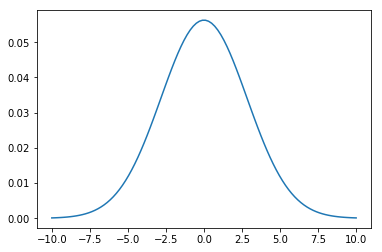

In [145]:
%matplotlib inline
import numpy
x = numpy.linspace(-10,10,100)
from matplotlib import pyplot as plt
y = [ f(r) for r in x ]
_=plt.plot(x,y,'-')

### Likelihood Ratio

Now we can compute $LR$ for all ancillary objects. The information we need to relate in a unique table is *magnitude* for each ancillary object --to be used by $q(m)$ and $n(m)$-- and *position error* from the sources table --to be used by $f(r)$.

In [146]:
ancillary_sample.head(10)

,Seq,SOURCEID,distances,e_Pos,KHALLMAG
0,2360,433834423123,2.558296,3.5,15.266109
1,2361,433834423565,0.738626,5.8,17.770628
2,2361,433834423638,5.615029,5.8,17.539215
3,2362,433836362467,6.797695,3.4,16.968500
4,2363,433836362494,3.585183,2.1,16.122658
5,2365,433832563084,5.428978,4.0,17.553614
6,2366,433836363120,4.329322,3.8,17.838139
7,2368,433836362527,6.895045,4.3,17.352652
8,2369,433836363145,2.324095,4.4,17.910995
9,2370,433834437127,4.105510,3.6,18.955881


In [147]:
background_sample.head()

,Seq,SOURCEID,distances,e_Pos,KHALLMAG
0,2360,433834423106,20.976242,3.5,16.983847
1,2360,433834423147,37.473506,3.5,17.809454
2,2360,433834423635,25.140111,3.5,18.346136
3,2361,433834423127,14.680191,5.8,17.177437
4,2361,433834423131,36.465238,5.8,17.322979


In [150]:
# df_lm2 = df_lm.set_index(ID_column_lm)
# df_lm2.head(10)

In [148]:
# _keys = ancillary_sample.index.droplevel(1).values
# ancillary_sample_poserror = ancillary_sample.merge( df_lm2[['e_Pos']], 
#                                                    left_on=_keys, right_index=True )
# ancillary_sample_poserror.head(10)

In [149]:
# ancillary_sample_poserror.drop('key_0',axis=1, inplace=True)

In [151]:
# # we define the vector to 'join' the left table because it is using a multindex index
# _keys = ancillary_sample.index.droplevel(0).values

# # _cols = [ c for c in df_uk.filter(like='MAG',axis=1).columns ]
# ancillary_joined = ancillary_sample_poserror.merge(ancillary_sample_magnitudes[[magnitude]], left_on=_keys, right_index=True )
# ancillary_joined.head(10)

In [152]:
# ancillary_joined.drop('key_0',axis=1,inplace=True)

In [153]:
e_pos = ancillary_sample['e_Pos'].mean()
print(e_pos)

2.82870090634


In [154]:
def define_LR(func_qm, func_fr, func_nm):
    def LR(r,m, qm=func_qm, fr=func_fr, nm=func_nm):
        return qm(m)*fr(r)/nm(m)
    return LR

In [155]:
func_fr = define_fr(e_pos,e_pos)

In [157]:
df = ancillary_sample.copy()

LR = define_LR(func_qm=func_qm.evaluate, func_fr=func_fr, func_nm=func_nm_b.evaluate)

colname = 'LR_{}'.format(magnitude)
df[colname] = df.apply(lambda x:LR(x['distances'],x[magnitude]), axis=1)
df.head(10)

,Seq,SOURCEID,distances,e_Pos,KHALLMAG,LR_KHALLMAG
0,2360,433834423123,2.558296,3.5,15.266109,0.081164
1,2361,433834423565,0.738626,5.8,17.770628,0.074063
2,2361,433834423638,5.615029,5.8,17.539215,0.030343
3,2362,433836362467,6.797695,3.4,16.968500,0.020784
4,2363,433836362494,3.585183,2.1,16.122658,0.054672
5,2365,433832563084,5.428978,4.0,17.553614,0.032216
6,2366,433836363120,4.329322,3.8,17.838139,0.042872
7,2368,433836362527,6.895045,4.3,17.352652,0.021313
8,2369,433836363145,2.324095,4.4,17.910995,0.067579
9,2370,433834437127,4.105510,3.6,18.955881,0.041441


In [162]:
def reliability(lr,Q=1):
    return lr/(sum(lr)+(1-Q))
Q = 1

lr_col = 'LR_{}'.format(magnitude)
r_col = 'R_{}'.format(magnitude)
df[r_col] = df.groupby('Seq')[lr_col].apply(reliability)

df.head()

,Seq,SOURCEID,distances,e_Pos,KHALLMAG,LR_KHALLMAG,R_KHALLMAG
0,2360,433834423123,2.558296,3.5,15.266109,0.081164,1.000000
1,2361,433834423565,0.738626,5.8,17.770628,0.074063,0.709378
2,2361,433834423638,5.615029,5.8,17.539215,0.030343,0.290622
3,2362,433836362467,6.797695,3.4,16.968500,0.020784,1.000000
4,2363,433836362494,3.585183,2.1,16.122658,0.054672,1.000000


In [176]:
r_col = 'R_{}'.format(magnitude)
lr_col = 'LR_{}'.format(magnitude)
def collapse_table(group):
    out = DataFrame(columns=['LR','duplicates','LRs'])
    out.index.name = 'SOURCEID'
    if len(group)==1:
        out['LR'] = group[lr_col]
        out['duplicates'] = None
        out['LRs'] = None
        out.index = group['SOURCEID']
        return out
    ind_max = group[r_col] == group[r_col].max()
    out['LR'] = group.loc[ind_max,lr_col]
    out['duplicates'] = ';'.join([ str(r) for r in group.loc[~ind_max,'SOURCEID'] ])
    out['LRs'] = ';'.join([ str(r) for r in group.loc[~ind_max,lr_col] ])
    out.index = group.loc[ind_max,'SOURCEID']
    return out
df_r = df.groupby('Seq').apply(collapse_table)
df_r

,,LR,duplicates,LRs
Seq,SOURCEID,,,
2360,433834423123,0.081164,None,None
2361,433834423565,0.074063,433834423638,0.0303425779311
2362,433836362467,0.020784,None,None
2363,433836362494,0.054672,None,None
2365,433832563084,0.032216,None,None
2366,433836363120,0.042872,None,None
2368,433836362527,0.021313,None,None
2369,433836363145,0.067579,None,None
2370,433834437127,0.041441,None,None


In [209]:
A_matched = df_lm.set_index('Seq').loc[df_r.index.droplevel(1)].reset_index()
# print(len(A_matched))
# A_matched.head()
B_matched = df_uk.set_index('SOURCEID').loc[df_r.index.droplevel(0)].reset_index()
# print(len(B_matched))
# B_matched.head()
AB_matched = df_r[['LR','duplicates','LRs']].reset_index(drop=True)
# print(len(AB_matched))
# AB_matched.head()

from pandas import concat
df = concat([ A_matched, B_matched, AB_matched ], axis=1, keys=['A','B','AB'])
print(len(df))
df.head()

1304


A                                                                   \
    Seq        ObsID   RAdeg  DEdeg e_Pos DistNN ExtFlag InXMM InChandra   
0  2360  742830101.0  14.115 -0.353   3.5  171.7     0.0    no        no   
1  2361  742830101.0  14.115 -0.160   5.8  291.7     0.0    no        no   
2  2362  742830101.0  14.142 -0.442   3.4   49.1     0.0    no        no   
3  2363  742830101.0  14.154 -0.448   2.1   49.1     0.0    no        no   
4  2365  742830101.0  14.162  0.038   4.0  224.1     0.0    no        no   

              ...                  B                                  \
  FSoft       ...        KHALLMAGERR  KPETROMAG KPETROMAGERR KPSFMAG   
0  1.68       ...           0.031406  15.165094     0.047093     NaN   
1  2.02       ...           0.234180  17.763853     0.258605     NaN   
2  0.95       ...           0.112740  16.943735     0.177616     NaN   
3  7.25       ...           0.049313  15.984794     0.066120     NaN   
4  1.64       ...           0.169763  17.494886     0.185832     NaN   

                                            AB                                 
  KPSFMAGERR  KAPERMAG3 KAPERMAG3ERR        LR    duplicates              LRs  
0        NaN  15.644726     0.019929  0.081164          None             None  
1        NaN  17.884663     0.145093  0.074063  433834423638  0.0303425779311  
2        NaN  17.142780     0.078272  0.020784          None             None  
3        NaN  16.248377     0.034981  0.054672          None             None  
4        NaN  17.446341     0.103341  0.032216          None             None  

[5 rows x 169 columns]

In [224]:
catA = df_lm[['Seq','RAdeg','DEdeg','e_Pos']].reset_index(drop=True)#pandas.merge(df_lm, df_r.reset_index(), on='Seq',how='left')
catA.index = catA['Seq']
print(len(catA))
catA.head()

2862


,Seq,RAdeg,DEdeg,e_Pos
Seq,,,,
2359,2359,14.097,0.166,4.7
2360,2360,14.115,-0.353,3.5
2361,2361,14.115,-0.160,5.8
2362,2362,14.142,-0.442,3.4
2363,2363,14.154,-0.448,2.1


In [225]:
BB_matched = B_matched.copy()
BB_matched.index = A_matched['Seq']
print(len(BB_matched))
BB_matched.head()

1304


,SOURCEID,RA,DEC,SIGRA,SIGDEC,EPOCH,EBV,AY,AJ,AH,...,HAPERMAG3,HAPERMAG3ERR,KHALLMAG,KHALLMAGERR,KPETROMAG,KPETROMAGERR,KPSFMAG,KPSFMAGERR,KAPERMAG3,KAPERMAG3ERR
Seq,,,,,,,,,,,,,,,,,,,,,
2360,433834423123,14.114893,-0.352297,NaN,NaN,2006.890867,0.024134,0.029226,0.021455,0.013949,...,16.420605,0.027337,15.266109,0.031406,15.165094,0.047093,NaN,NaN,15.644726,0.019929
2361,433834423565,14.114795,-0.160001,NaN,NaN,2006.969972,0.021508,0.026046,0.019120,0.012431,...,18.644693,0.198955,17.770628,0.234180,17.763853,0.258605,NaN,NaN,17.884663,0.145093
2362,433836362467,14.141094,-0.440343,NaN,NaN,2006.882247,0.024106,0.029192,0.021430,0.013933,...,17.760912,0.083793,16.968500,0.112740,16.943735,0.177616,NaN,NaN,17.142780,0.078272
2363,433836362494,14.154556,-0.447174,NaN,NaN,2006.882247,0.024283,0.029406,0.021587,0.014035,...,17.173470,0.049189,16.122658,0.049313,15.984794,0.066120,NaN,NaN,16.248377,0.034981
2365,433832563084,14.162007,0.039508,NaN,NaN,2006.890863,0.025553,0.030945,0.022717,0.014770,...,17.777243,0.096601,17.553614,0.169763,17.494886,0.185832,NaN,NaN,17.446341,0.103341


In [227]:
LR_matched = df_r[['LR','duplicates','LRs']].reset_index(level=1,drop=True)
print(len(LR_matched))
LR_matched.head()

1304


,LR,duplicates,LRs
Seq,,,
2360,0.081164,None,None
2361,0.074063,433834423638,0.0303425779311
2362,0.020784,None,None
2363,0.054672,None,None
2365,0.032216,None,None


In [228]:
from pandas import concat
df = concat([ catA, BB_matched, LR_matched ], axis=1, keys=['A','B','AB'])
print(len(df))
df.head()

2862


A                                  B                             \
       Seq   RAdeg  DEdeg e_Pos      SOURCEID         RA       DEC SIGRA   
2359  2359  14.097  0.166   4.7           NaN        NaN       NaN   NaN   
2360  2360  14.115 -0.353   3.5  433834423123  14.114893 -0.352297   NaN   
2361  2361  14.115 -0.160   5.8  433834423565  14.114795 -0.160001   NaN   
2362  2362  14.142 -0.442   3.4  433836362467  14.141094 -0.440343   NaN   
2363  2363  14.154 -0.448   2.1  433836362494  14.154556 -0.447174   NaN   

                               ...                                             \
     SIGDEC        EPOCH       ...        KHALLMAGERR  KPETROMAG KPETROMAGERR   
2359    NaN          NaN       ...                NaN        NaN          NaN   
2360    NaN  2006.890867       ...           0.031406  15.165094     0.047093   
2361    NaN  2006.969972       ...           0.234180  17.763853     0.258605   
2362    NaN  2006.882247       ...           0.112740  16.943735     0.177616   
2363    NaN  2006.882247       ...           0.049313  15.984794     0.066120   

                                                       AB                \
     KPSFMAG KPSFMAGERR  KAPERMAG3 KAPERMAG3ERR        LR    duplicates   
2359     NaN        NaN        NaN          NaN       NaN           NaN   
2360     NaN        NaN  15.644726     0.019929  0.081164          None   
2361     NaN        NaN  17.884663     0.145093  0.074063  433834423638   
2362     NaN        NaN  17.142780     0.078272  0.020784          None   
2363     NaN        NaN  16.248377     0.034981  0.054672          None   

                       
                  LRs  
2359              NaN  
2360             None  
2361  0.0303425779311  
2362             None  
2363             None  

[5 rows x 52 columns]

In [95]:
r_col = 'R_{}'.format(magnitude)
temp_df = df.filter(like=magnitude, axis=1)
mask = temp_df.groupby(level=0)[r_col].apply(lambda x:x==x.max())
temp_df.loc[mask]


,,KHALLMAG,LR_KHALLMAG,R_KHALLMAG
"(A, Seq)",duplicates,,,
2360,433834423123,15.266109,0.080638,1.000000
2361,433834423565,17.770628,0.080156,0.722293
2362,433836362467,16.968500,0.020484,1.000000
2363,433836362494,16.122658,0.053398,1.000000
2365,433832563084,17.553614,0.032985,1.000000
2366,433836363120,17.838139,0.045263,1.000000
2368,433836362527,17.352652,0.021691,1.000000
2369,433836363145,17.910995,0.067301,1.000000
2370,433834437127,18.955881,0.047079,1.000000


In [96]:
# for c in final_matches_perMag.keys():
#     print(final_matches_perMag[c])

NameError: name 'final_matches_perMag' is not defined

In [82]:
col = 'YAPERMAG3'
mle_match = final_matches_perMag[col]
for col in 'J_1APERMAG3 HAPERMAG3 KAPERMAG3'.split():
    tab = final_matches_perMag[col]
    mle_match = mle_match.merge(tab, how='outer', left_index=True, right_index=True)

In [83]:
mle_match.head(20)

YAPERMAG3  YAPERMAG3ERR  LR_YAPERMAG3  R_YAPERMAG3  \
(A, Seq) duplicates                                                         
2360     433834423123  17.924706      0.023942      0.015332     1.000000   
2361     433834423565        NaN           NaN           NaN          NaN   
         433834423638        NaN           NaN           NaN          NaN   
2362     433836362467  18.888762      0.070068     -2.800060     1.000000   
2363     433836362494  18.222660      0.039503      0.046278     1.000000   
2365     433832563084  18.878496      0.053765     -4.183243     1.000000   
2366     433836363120        NaN           NaN           NaN          NaN   
2368     433836362527  20.279314      0.241452     -0.000918     1.000000   
2369     433836363145        NaN           NaN           NaN          NaN   
2370     433834437127  20.141270      0.159393     -0.002145     1.000000   
2371     433836363155        NaN           NaN           NaN          NaN   
2372     433829058905  20.627474      0.219280     -0.000037     1.000000   
2373     433832563245  18.467182      0.038477      0.226794     1.000000   
2374     433832563005  19.307280      0.076326     -0.028681     0.915217   
2375     433836363033        NaN           NaN           NaN          NaN   
2377     433830897005  20.111305      0.142833     -0.002775     1.000000   
2378     433832563193  17.243748      0.015382      0.010406     1.000000   
         433832563562        NaN           NaN           NaN          NaN   
2379     433834437256  19.261967      0.074662     -0.045075     1.000000   
2380     433836362941        NaN           NaN           NaN          NaN   

                       J_1APERMAG3  J_1APERMAG3ERR  LR_J_1APERMAG3  \
(A, Seq) duplicates                                                  
2360     433834423123    17.245426        0.019872        0.028080   
2361     433834423565    19.491657        0.146564       -0.005289   
         433834423638          NaN             NaN             NaN   
2362     433836362467    18.414364        0.067330        0.177738   
2363     433836362494    17.871763        0.041378        0.029622   
2365     433832563084    18.501507        0.062208        0.311976   
2366     433836363120          NaN             NaN             NaN   
2368     433836362527    19.435019        0.169515       -0.012953   
2369     433836363145          NaN             NaN             NaN   
2370     433834437127          NaN             NaN             NaN   
2371     433836363155          NaN             NaN             NaN   
2372     433829058905    19.613602        0.154692       -0.002648   
2373     433832563245    18.165794        0.046680        0.053318   
2374     433832563005    19.322327        0.131315       -0.033419   
2375     433836363033          NaN             NaN             NaN   
2377     433830897005          NaN             NaN             NaN   
2378     433832563193          NaN             NaN             NaN   
         433832563562    18.779383        0.081248        2.367595   
2379     433834437256    18.953220        0.094430       -1.037225   
2380     433836362941    19.408398        0.167378       -0.020944   

                       R_J_1APERMAG3  HAPERMAG3  HAPERMAG3ERR  LR_HAPERMAG3  \
(A, Seq) duplicates                                                           
2360     433834423123       1.000000  16.420605      0.027337      0.071227   
2361     433834423565       1.000000  18.644693      0.198955      0.843252   
         433834423638            NaN        NaN           NaN           NaN   
2362     433836362467       1.000000  17.760912      0.083793      0.035366   
2363     433836362494       1.000000  17.173470      0.049189      0.055195   
2365     433832563084       1.000000  17.777243      0.096601      0.030268   
2366     433836363120            NaN        NaN           NaN           NaN   
2368     433836362527       1.000000  18.432409      0.153373      0.260244 

In [84]:
temp_df = mle_match.filter(regex="^R_", axis=1)

mask = temp_df.agg('sum',axis=1).groupby(level=0).apply(lambda x:x==x.max())

mle_match_final = mle_match.loc[mask]
mle_match_final.head(10)

,,YAPERMAG3,YAPERMAG3ERR,LR_YAPERMAG3,R_YAPERMAG3,J_1APERMAG3,J_1APERMAG3ERR,LR_J_1APERMAG3,R_J_1APERMAG3,HAPERMAG3,HAPERMAG3ERR,LR_HAPERMAG3,R_HAPERMAG3,KAPERMAG3,KAPERMAG3ERR,LR_KAPERMAG3,R_KAPERMAG3
"(A, Seq)",duplicates,,,,,,,,,,,,,,,,
2360,433834423123,17.924706,0.023942,0.015332,1.0,17.245426,0.019872,0.028080,1.0,16.420605,0.027337,0.071227,1.0,15.644726,0.019929,0.081955,1.0
2361,433834423565,NaN,NaN,NaN,NaN,19.491657,0.146564,-0.005289,1.0,18.644693,0.198955,0.843252,1.0,NaN,NaN,NaN,NaN
2362,433836362467,18.888762,0.070068,-2.800060,1.0,18.414364,0.067330,0.177738,1.0,17.760912,0.083793,0.035366,1.0,17.142780,0.078272,0.077586,1.0
2363,433836362494,18.222660,0.039503,0.046278,1.0,17.871763,0.041378,0.029622,1.0,17.173470,0.049189,0.055195,1.0,16.248377,0.034981,0.110417,1.0
2365,433832563084,18.878496,0.053765,-4.183243,1.0,18.501507,0.062208,0.311976,1.0,17.777243,0.096601,0.030268,1.0,17.446341,0.103341,0.069000,1.0
2366,433836363120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.112112,0.189446,0.042469,1.0
2368,433836362527,20.279314,0.241452,-0.000918,1.0,19.435019,0.169515,-0.012953,1.0,18.432409,0.153373,0.260244,1.0,17.248894,0.086354,0.064378,1.0
2369,433836363145,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.370745,0.240838,0.050331,1.0
2370,433834437127,20.141270,0.159393,-0.002145,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.318068,0.225548,0.058400,1.0


In [85]:
mle_match_reliability = mle_match_final.filter(like='R_',axis=1)
mle_match_reliability.head(10)

,,LR_YAPERMAG3,R_YAPERMAG3,LR_J_1APERMAG3,R_J_1APERMAG3,LR_HAPERMAG3,R_HAPERMAG3,LR_KAPERMAG3,R_KAPERMAG3
"(A, Seq)",duplicates,,,,,,,,
2360,433834423123,0.015332,1.0,0.028080,1.0,0.071227,1.0,0.081955,1.0
2361,433834423565,NaN,NaN,-0.005289,1.0,0.843252,1.0,NaN,NaN
2362,433836362467,-2.800060,1.0,0.177738,1.0,0.035366,1.0,0.077586,1.0
2363,433836362494,0.046278,1.0,0.029622,1.0,0.055195,1.0,0.110417,1.0
2365,433832563084,-4.183243,1.0,0.311976,1.0,0.030268,1.0,0.069000,1.0
2366,433836363120,NaN,NaN,NaN,NaN,NaN,NaN,0.042469,1.0
2368,433836362527,-0.000918,1.0,-0.012953,1.0,0.260244,1.0,0.064378,1.0
2369,433836363145,NaN,NaN,NaN,NaN,NaN,NaN,0.050331,1.0
2370,433834437127,-0.002145,1.0,NaN,NaN,NaN,NaN,0.058400,1.0


In [86]:
df_lm.head()

,ObsID,RAdeg,DEdeg,e_Pos,DistNN,ExtFlag,InXMM,InChandra,FSoft,e_FSoft,...,rH,F250,e_F250,F350,e_F350,F500,e_F500,XMMAO10CP,ChCP,CPCoord
Seq,,,,,,,,,,,,,,,,,,,,,
2359,742830101.0,14.097,0.166,4.7,515.8,0.0,no,no,1.61,0.52,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2360,742830101.0,14.115,-0.353,3.5,171.7,0.0,no,no,1.68,0.38,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2361,742830101.0,14.115,-0.160,5.8,291.7,0.0,no,no,2.02,0.50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2362,742830101.0,14.142,-0.442,3.4,49.1,0.0,no,no,0.95,0.26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2363,742830101.0,14.154,-0.448,2.1,49.1,0.0,no,no,7.25,0.63,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [87]:
# cat_lm.set_index('Seq', inplace=True)
match_mle_a = df_lm.loc[mle_match_reliability.index.droplevel(1).values]

In [88]:
df_uk.head()

,SOURCEID,RA,DEC,SIGRA,SIGDEC,EPOCH,EBV,AY,AJ,AH,...,HAPERMAG3,HAPERMAG3ERR,KHALLMAG,KHALLMAGERR,KPETROMAG,KPETROMAGERR,KPSFMAG,KPSFMAGERR,KAPERMAG3,KAPERMAG3ERR
0,433827929919,23.367877,0.687888,NaN,NaN,2005.902151,0.022051,0.026704,0.019603,0.012745,...,18.506187,0.151259,16.839336,0.166297,17.013243,0.244477,NaN,NaN,17.544065,0.124013
1,433827929920,23.460531,0.688232,NaN,NaN,2005.902151,0.023649,0.028639,0.021024,0.013669,...,16.893356,0.035704,16.618038,0.080816,16.661270,0.118318,NaN,NaN,16.565256,0.051986
2,433827929921,23.414002,0.687667,NaN,NaN,2005.902151,0.022683,0.027469,0.020165,0.013111,...,18.633087,0.170696,17.692490,0.398679,17.692490,0.398679,NaN,NaN,17.764069,0.152736
3,433827929922,23.280570,0.687302,NaN,NaN,2005.902151,0.022506,0.027254,0.020007,0.013008,...,16.557207,0.026067,15.337543,0.038435,15.085359,0.060233,NaN,NaN,15.807901,0.025575
4,433827929923,23.474184,0.687547,NaN,NaN,2005.902151,0.023927,0.028976,0.021271,0.013830,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [89]:
df_uk.set_index('SOURCEID', inplace=True)
match_mle_b = df_uk.loc[mle_match_reliability.index.droplevel(0).values]

In [90]:
match_mle_a.head()

,ObsID,RAdeg,DEdeg,e_Pos,DistNN,ExtFlag,InXMM,InChandra,FSoft,e_FSoft,...,rH,F250,e_F250,F350,e_F350,F500,e_F500,XMMAO10CP,ChCP,CPCoord
Seq,,,,,,,,,,,,,,,,,,,,,
2360,742830101.0,14.115,-0.353,3.5,171.7,0.0,no,no,1.68,0.38,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2361,742830101.0,14.115,-0.160,5.8,291.7,0.0,no,no,2.02,0.50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2362,742830101.0,14.142,-0.442,3.4,49.1,0.0,no,no,0.95,0.26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2363,742830101.0,14.154,-0.448,2.1,49.1,0.0,no,no,7.25,0.63,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2365,742830101.0,14.162,0.038,4.0,224.1,0.0,no,no,1.64,0.44,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [91]:
match_mle_b.head()

,RA,DEC,SIGRA,SIGDEC,EPOCH,EBV,AY,AJ,AH,AK,...,HAPERMAG3,HAPERMAG3ERR,KHALLMAG,KHALLMAGERR,KPETROMAG,KPETROMAGERR,KPSFMAG,KPSFMAGERR,KAPERMAG3,KAPERMAG3ERR
SOURCEID,,,,,,,,,,,,,,,,,,,,,
433834423123,14.114893,-0.352297,NaN,NaN,2006.890867,0.024134,0.029226,0.021455,0.013949,0.008688,...,16.420605,0.027337,15.266109,0.031406,15.165094,0.047093,NaN,NaN,15.644726,0.019929
433834423565,14.114795,-0.160001,NaN,NaN,2006.969972,0.021508,0.026046,0.019120,0.012431,0.007743,...,18.644693,0.198955,17.770628,0.234180,17.763853,0.258605,NaN,NaN,17.884663,0.145093
433836362467,14.141094,-0.440343,NaN,NaN,2006.882247,0.024106,0.029192,0.021430,0.013933,0.008678,...,17.760912,0.083793,16.968500,0.112740,16.943735,0.177616,NaN,NaN,17.142780,0.078272
433836362494,14.154556,-0.447174,NaN,NaN,2006.882247,0.024283,0.029406,0.021587,0.014035,0.008742,...,17.173470,0.049189,16.122658,0.049313,15.984794,0.066120,NaN,NaN,16.248377,0.034981
433832563084,14.162007,0.039508,NaN,NaN,2006.890863,0.025553,0.030945,0.022717,0.014770,0.009199,...,17.777243,0.096601,17.553614,0.169763,17.494886,0.185832,NaN,NaN,17.446341,0.103341


In [92]:
final_mle_match = pandas.concat([ match_mle_a.reset_index(), match_mle_b.reset_index()], axis=1).set_index([ID_column_lm,ID_column_uk])

In [93]:
final_mle_match.head()

,,ObsID,RAdeg,DEdeg,e_Pos,DistNN,ExtFlag,InXMM,InChandra,FSoft,e_FSoft,...,HAPERMAG3,HAPERMAG3ERR,KHALLMAG,KHALLMAGERR,KPETROMAG,KPETROMAGERR,KPSFMAG,KPSFMAGERR,KAPERMAG3,KAPERMAG3ERR
Seq,SOURCEID,,,,,,,,,,,,,,,,,,,,,
2360,433834423123,742830101.0,14.115,-0.353,3.5,171.7,0.0,no,no,1.68,0.38,...,16.420605,0.027337,15.266109,0.031406,15.165094,0.047093,NaN,NaN,15.644726,0.019929
2361,433834423565,742830101.0,14.115,-0.160,5.8,291.7,0.0,no,no,2.02,0.50,...,18.644693,0.198955,17.770628,0.234180,17.763853,0.258605,NaN,NaN,17.884663,0.145093
2362,433836362467,742830101.0,14.142,-0.442,3.4,49.1,0.0,no,no,0.95,0.26,...,17.760912,0.083793,16.968500,0.112740,16.943735,0.177616,NaN,NaN,17.142780,0.078272
2363,433836362494,742830101.0,14.154,-0.448,2.1,49.1,0.0,no,no,7.25,0.63,...,17.173470,0.049189,16.122658,0.049313,15.984794,0.066120,NaN,NaN,16.248377,0.034981
2365,433832563084,742830101.0,14.162,0.038,4.0,224.1,0.0,no,no,1.64,0.44,...,17.777243,0.096601,17.553614,0.169763,17.494886,0.185832,NaN,NaN,17.446341,0.103341


In [94]:
final_mle_match.tail()

,,ObsID,RAdeg,DEdeg,e_Pos,DistNN,ExtFlag,InXMM,InChandra,FSoft,e_FSoft,...,HAPERMAG3,HAPERMAG3ERR,KHALLMAG,KHALLMAGERR,KPETROMAG,KPETROMAGERR,KPSFMAG,KPSFMAGERR,KAPERMAG3,KAPERMAG3ERR
Seq,SOURCEID,,,,,,,,,,,,,,,,,,,,,
5213,433832462768,747440101.0,27.994,0.063,3.3,138.7,0.0,no,no,0.99,0.26,...,17.786472,0.099437,16.651016,0.118230,16.779015,0.213026,NaN,NaN,16.925835,0.074258
5215,433836104605,747440101.0,28.000,-0.415,2.5,174.1,0.0,no,no,1.15,0.25,...,13.036633,0.002181,12.830576,0.003338,12.822956,0.003539,NaN,NaN,12.797623,0.002469
5217,433836104787,747440101.0,28.007,-0.463,3.5,141.3,0.0,no,no,0.77,0.25,...,18.339977,0.154737,17.724470,0.259511,17.860441,0.402296,NaN,NaN,17.639168,0.117859
5219,433834205134,747440101.0,28.024,-0.263,3.1,242.2,0.0,no,no,0.85,0.25,...,18.424446,0.180232,17.181353,0.245283,17.160769,0.228786,NaN,NaN,17.618818,0.149170
5220,433830737812,747440101.0,28.044,0.134,4.1,167.0,0.0,no,no,0.79,0.22,...,17.293871,0.057284,15.975023,0.099189,16.141174,0.182109,NaN,NaN,16.625101,0.057040


In [95]:
final_mle_match.sample(5)

,,ObsID,RAdeg,DEdeg,e_Pos,DistNN,ExtFlag,InXMM,InChandra,FSoft,e_FSoft,...,HAPERMAG3,HAPERMAG3ERR,KHALLMAG,KHALLMAGERR,KPETROMAG,KPETROMAGERR,KPSFMAG,KPSFMAGERR,KAPERMAG3,KAPERMAG3ERR
Seq,SOURCEID,,,,,,,,,,,,,,,,,,,,,
3054,433830832449,747390101.0,17.034,0.077,3.7,66.1,0.0,no,no,0.38,0.10,...,18.645838,0.203443,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3629,433828292717,747400101.0,19.402,0.562,2.3,86.3,0.0,no,no,3.07,0.44,...,NaN,NaN,18.317797,0.312936,18.156382,0.351777,NaN,NaN,18.165691,0.184878
2817,433832583778,742830101.0,15.938,-0.121,2.9,193.3,0.0,no,no,1.53,0.24,...,18.212225,0.149940,17.668640,0.176986,17.776709,0.286265,NaN,NaN,17.455675,0.101515
3574,433834318228,747400101.0,19.210,-0.307,1.7,76.1,0.0,no,no,2.28,0.22,...,17.596136,0.060489,16.403347,0.086130,16.509922,0.160516,NaN,NaN,16.863695,0.051403
2635,433830901006,742830101.0,15.247,0.205,2.1,214.9,0.0,no,no,1.72,0.19,...,17.111403,0.049267,16.229816,0.059616,16.244713,0.088863,NaN,NaN,16.150557,0.033153


In [96]:
final_mle_match.describe()

               ObsID        RAdeg        DEdeg        e_Pos       DistNN  \
count   1.492000e+03  1492.000000  1492.000000  1492.000000  1492.000000   
unique           NaN          NaN          NaN          NaN          NaN   
top              NaN          NaN          NaN          NaN          NaN   
freq             NaN          NaN          NaN          NaN          NaN   
mean    7.465153e+08    20.871196    -0.035375     2.842091   127.074665   
std     1.822402e+06     4.348811     0.287653     0.906100    79.624401   
min     7.428301e+08    14.115000    -0.617000     0.400000    16.400000   
25%     7.473901e+08    17.036250    -0.282250     2.300000    72.700000   
50%     7.474001e+08    19.875000    -0.027500     2.800000   112.600000   
75%     7.474301e+08    25.142750     0.189000     3.400000   162.875000   
max     7.474401e+08    28.044000     0.604000     7.300000   765.400000   

            ExtFlag InXMM InChandra        FSoft      e_FSoft      ...       \
count   

In [97]:
RA_diff = final_mle_match['RAdeg'] - final_mle_match['RA']
RA_diff.describe()

count    1492.000000
mean       -0.000087
std         0.000646
min        -0.001874
25%        -0.000508
50%        -0.000090
75%         0.000295
max         0.001933
dtype: float64

Total number of rows: 1492 (1.5e+03)

-> Has Nil? (How many?)
0 (0.000%)


In [98]:
DEC_diff = final_mle_match['DEdeg'] - final_mle_match['DEC']
DEC_diff.describe()

count    1492.000000
mean       -0.000126
std         0.000637
min        -0.001886
25%        -0.000537
50%        -0.000134
75%         0.000265
max         0.001909
dtype: float64

Total number of rows: 1492 (1.5e+03)

-> Has Nil? (How many?)
0 (0.000%)


In [99]:
final_mle_match.to_csv('lamassa_ukidss_MatchMLE.csv')

# Plot samples

## ancillary *vs* background

Trying to find the difference between them...

In [ ]:
_ = plot_distros('KAPERMAG3')

In [ ]:
_ = plot_distros('J_1APERMAG3')

In [ ]:
_ = plot_distros('YAPERMAG3')

In [ ]:
_ = plot_distros('HAPERMAG3')

In [ ]:
from booq.plot import PlotHisto
p = PlotHisto()
# for col in ['YAPERMAG3','J_1APERMAG3','HAPERMAG3','KAPERMAG3']:
#     ds_label = p.add_dataset(cat_uk_sample,label=col,x=col)
#     p.plot(ds_label)
col = 'KAPERMAG3'
dsl = p.add_dataset(background_sample_magnitudes, label='background',x=col)
p.plot(dsl)
dsl = p.add_dataset(ancillary_sample_magnitudes, label='ancillary', x=col)
p.plot(dsl)
p.show()

In [ ]:
def plot_colors(col1,col2,col3):
    from booq import plot
    p = plot.PlotScatter()

    bkg_12 = background_sample_magnitudes[col1] - background_sample_magnitudes[col2]
    bkg_23 = background_sample_magnitudes[col2] - background_sample_magnitudes[col3]

    anc_12 = ancillary_sample_magnitudes[col1] - ancillary_sample_magnitudes[col2]
    anc_23 = ancillary_sample_magnitudes[col2] - ancillary_sample_magnitudes[col3]


    db = {12:bkg_12.values, 23:bkg_23.values}
    dsl = p.add_dataset(db, label='bkg', x=12, y=23)
    p.plot(dsl)

    da = {12:anc_12.values, 23:anc_23.values}
    dsl = p.add_dataset(da, label='anc', x=12, y=23)
    p.plot(dsl)

    p.show()
    
plot_colors('YAPERMAG3','J_1APERMAG3','HAPERMAG3')

In [ ]:
plot_colors('J_1APERMAG3','HAPERMAG3','KAPERMAG3')

In [ ]:
def plot_grid_scatter(cols):
    dfb = background_sample_magnitudes[cols]
    dfb['sample'] = 'background'

    dfa = ancillary_sample_magnitudes[cols]
    dfa['sample'] = 'ancillary'

    df = dfb.append(dfa)

    import matplotlib.pyplot as plt
    import seaborn as sns
    sns.set()
    g = sns.PairGrid(df, hue="sample")
#     try:
    gg = g.map_diag(sns.kdeplot)
    gg = gg.map_offdiag(plt.scatter)
#     except:
#         gg = g.map(plt.scatter)
    g = gg.add_legend()

plot_grid_scatter(['YAPERMAG3','J_1APERMAG3','HAPERMAG3','KAPERMAG3'])

In [ ]:
ancillary_sample_magnitudes.columns

In [ ]:
cols = ['YHALLMAG','YPETROMAG','YAPERMAG3']
plot_grid_scatter(cols)

In [ ]:
cols = ['J_1HALLMAG','J_1PETROMAG','J_1APERMAG3']
plot_grid_scatter(cols)

In [ ]:
cols = ['HHALLMAG','HPETROMAG','HAPERMAG3']
plot_grid_scatter(cols)

In [ ]:
cols = ['KHALLMAG','KPETROMAG','KAPERMAG3']
plot_grid_scatter(cols)

In [ ]:
bkg_ratio_PetroHall_K = background_sample_magnitudes['KPETROMAG']/background_sample_magnitudes['KHALLMAG']
anc_ratio_PetroHall_K = ancillary_sample_magnitudes['KPETROMAG']/ancillary_sample_magnitudes['KHALLMAG']
d = {'bkg':bkg_ratio_PetroHall_K, 'anc':anc_ratio_PetroHall_K}

from booq.plot import PlotHisto
p = PlotHisto()
dsl = p.add_dataset(d, label='background',x='bkg')
p.plot(dsl)
dsl = p.add_dataset(d, label='ancillary', x='anc')
p.plot(dsl)
p.show()

In [ ]:
def cdf(vec,bins):
    import numpy as np
    h,b = np.histogram(vec,bins=bins)
    cdf = np.cumsum(h)
    cdf = cdf/cdf.sum()
    return cdf,h
def ks_test(vec1,vec2):
    import numpy as np
    vmin = min(vec1.min(),vec2.min())
    vmax = max(vec1.max(),vec2.max())
    bins = np.linspace(vmin,vmax,50)
    cdf1,h1 = cdf(vec1,bins)
    cdf2,h2 = cdf(vec2,bins)
    assert len(cdf1)==len(cdf2)
    dist = 0
    dist_i = None
    for i in range(len(cdf1)):
        diff = abs(cdf1[i]-cdf2[i])
        if diff > dist:
            dist = diff
            dist_i = i
    i = dist_i
    
    from matplotlib import pyplot as plt
    fig,ax = plt.subplots()
    x = bins[:-1] + np.diff(bins)/2
    ax.plot(x,cdf1,'b-')
    ax.plot(x,cdf2,'r-')
    test_x = [x[i],x[i]]
    _my = min(cdf1[i],cdf2[i])
    test_y = [_my, (dist+_my)]
    ax.plot(test_x,test_y,'g-')
    return dist,h1.sum(),h2.sum()

df = DataFrame(d)
vec1 = df['bkg'].dropna()
vec2 = df['anc'].dropna()
ks_dist,n1,n2 = ks_test(vec1,vec2)
print('KS distance: {}'.format(ks_dist))
print('Number of points, vec1: {}'.format(n1))
print('Number of points, vec2: {}'.format(n2))

In [ ]:
df = DataFrame(d)
vec1 = df['bkg'].dropna()
vec2 = df['anc'].dropna()
ks_dist,n1,n2 = ks_test(vec1,vec2)
print('KS distance: {}'.format(ks_dist))
print('Number of points, vec1: {}'.format(n1))
print('Number of points, vec2: {}'.format(n2))